Reference: https://github.com/enakai00/jupyter_tfbook

In [8]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

$$ f(x_1, x_2) = w_0 + w_1 x_1 + w_2 x_2 = 0 $$

Sigmoid function

$$ \sigma(x) = \frac{1}{1 + e^{-x}} $$

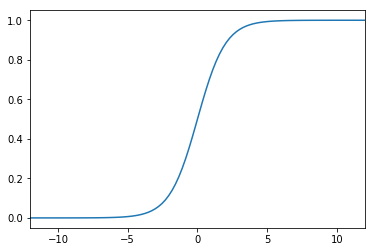

In [10]:
fig = plt.figure()
subplot = fig.add_subplot(1, 1, 1)
subplot.set_xlim(-12, 12)
x = np.linspace(-12, 12, 100)
y = 1/(1 + np.exp(-x))
subplot.plot(x, y)

$$ P(x_1, x_2) = \sigma(f(x_1, x_2)) $$